In [206]:
#Import Necessary Libraries

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt 
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

In [207]:
#reading the data into pandas dataframe

train = pd.read_csv('wdbc.csv')

In [208]:
train.head()

,ID,Diagnosis,radius_1,texture_1,parameter_1,area_1,smoothness_1,compactness_1,concavity_1,concave points_1,...,radius_3,texture_3,parameter_3,area_3,smoothness_3,compactness_3,concavity_3,concave points_3,symmetry_3,fractal dimension_3
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [209]:
# Train Test Split

x_train, x_test, y_train, y_test = train_test_split(train.drop("Diagnosis",axis=1),
                                                    train['Diagnosis'], test_size=0.20,
                                                    random_state=101)

In [210]:
#Random Forest 

classifier = RandomForestClassifier()
classifier.fit(x_train, y_train)

RandomForestClassifier()

In [211]:
y_pred = classifier.predict(x_test)

In [212]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:",accuracy)

Accuracy: 0.9736842105263158


In [213]:
print("Classification Report:") 
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           B       0.97      0.99      0.98        72
           M       0.98      0.95      0.96        42

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



In [214]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Confusion Matrix:
[[71  1]
 [ 2 40]]


Random Forest Accuracy: 0.9737
              precision    recall  f1-score   support

           B       0.97      0.99      0.98        72
           M       0.98      0.95      0.96        42

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



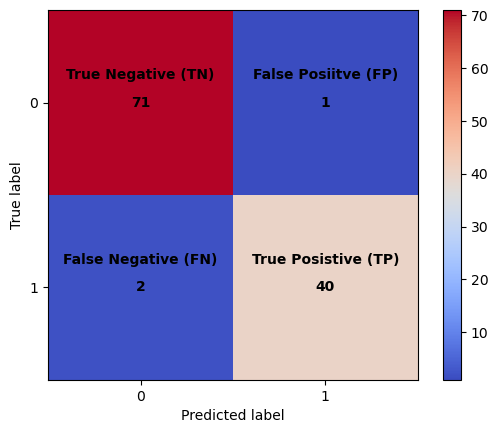

In [215]:
print(f"Random Forest Accuracy: {accuracy:.4f}")
print(classification_report(y_test, y_pred))

#Confusion Matrix 
con_matrix = confusion_matrix(y_test, y_pred) 

#Plot confusion matrix 
disp = ConfusionMatrixDisplay(confusion_matrix=con_matrix, display_labels=[0, 1])
disp.plot(cmap='coolwarm', text_kw={'color': 'black', 'fontsize': 10, 'fontweight': 'bold'})
                                    
#Add labels directly on top of the numbers
labels = [["True Negative (TN)", "False Posiitve (FP)"], ["False Negative (FN)", "True Posistive (TP)"]]

for i in range(2): 
    for j in range(2): 
        plt.text(j, i - 0.15, labels[i][j], ha='center', va='center', color='black', fontsize=10, fontweight='bold')

In [216]:
#Define Hyperparameter Grid for Random Forest Classifier (only using the training set)

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

#Function to Optimize Models using GridSearchCV
def optimize_model(model, param_grid, x_train, y_train):
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2, scoring='accuracy')
    grid_search.fit(x_train, y_train)
    print(f"Best Parameters for {model.__class__.__name__}: {grid_search.best_params_}")
    return grid_search.best_estimator_

#Model Training & Optimization for Classification
# Random Forest
rf_classifier_opt = optimize_model(RandomForestClassifier(), param_grid, x_train, y_train)
y_test_pred = rf_classifier_opt.predict(x_test)
test_acc = accuracy_score(y_test, y_test_pred)
print(f"Optimized Random Forest Test Accuracy: {test_acc:.4f}")
print(classification_report(y_test, y_test_pred))

Fitting 3 folds for each of 24 candidates, totalling 72 fits
Best Parameters for RandomForestClassifier: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
Optimized Random Forest Test Accuracy: 0.9737
              precision    recall  f1-score   support

           B       0.97      0.99      0.98        72
           M       0.98      0.95      0.96        42

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

